In [1]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv('placement.csv')
df.head()
df.shape

(1000, 3)

In [5]:
import matplotlib.pyplot as plt

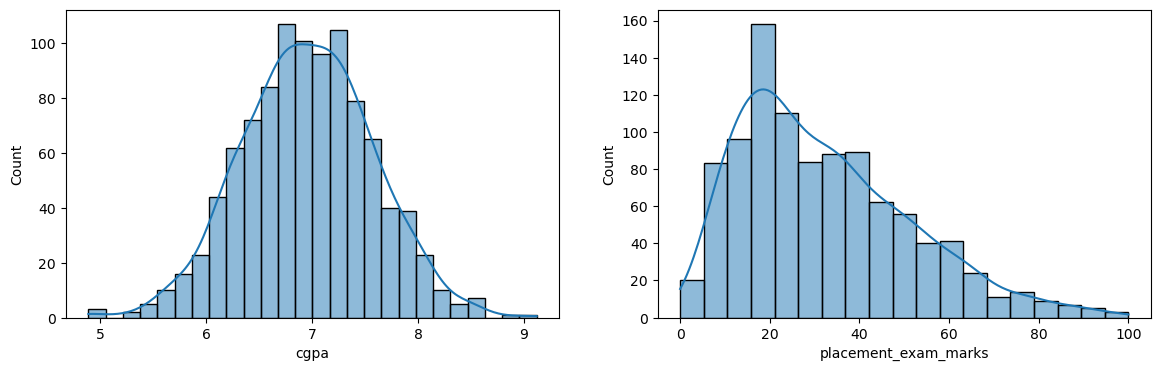

In [17]:
import seaborn as sns
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['cgpa'],kde=True)

plt.subplot(122)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.show()

In [21]:
print('Mean of cgpa: ',df['cgpa'].mean())
print('S.D of cgpa: ',df['cgpa'].std())
print('Min of cgpa: ',df['cgpa'].min())
print('Max of cgpa: ',df['cgpa'].max())

Mean of cgpa:  6.96124
S.D of cgpa:  0.6158978751323894
Min of cgpa:  4.89
Max of cgpa:  9.12


In [23]:
print('Min Allowed: ',df['cgpa'].mean() - 3*df['cgpa'].std())
print('Max Allowed: ',df['cgpa'].mean() + 3*df['cgpa'].std())

Min Allowed:  5.113546374602832
Max Allowed:  8.808933625397168


In [37]:
# find outliers

df[(df['cgpa']>8.808933625397168) |  (df['cgpa']<5.113546374602832)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [52]:
trimmed = df[(df['cgpa']<8.8) & (df['cgpa']>5.11)]
trimmed.shape


(995, 3)

# Capping

In [56]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [58]:
upper_limit


8.808933625397168

In [60]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [62]:
df.cgpa.describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64